In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
data_train_path = 'Birds_Species_dataset/train'
data_test_path = 'Birds_Species_dataset/test'
data_val_path = 'Birds_Species_dataset/valid'

* Définition des dimensions d’entrée des images.

* Compatible avec les architectures CNN modernes .

In [ ]:
img_width =224
img_height =224

* Chargement du dataset d’entraînement :

* Images redimensionnées à 224x224.

* Chargement en batches (batch_size=32).

* Prétraitement pour le pipeline Keras (structure (batch_size, height, width, channels)).



In [ ]:
data_train= tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False
)

Found 3208 files belonging to 20 classes.


* Extraction des étiquettes de classes à partir de la structure des dossiers.

* Important pour déterminer le nombre de neurones en sortie du modèle.

In [ ]:
data_cat = data_train.class_names
data_cat

['ABBOTTS BABBLER',
 'ABBOTTS BOOBY',
 'ABYSSINIAN GROUND HORNBILL',
 'AFRICAN CROWNED CRANE',
 'AFRICAN EMERALD CUCKOO',
 'AFRICAN FIREFINCH',
 'AFRICAN OYSTER CATCHER',
 'AFRICAN PIED HORNBILL',
 'AFRICAN PYGMY GOOSE',
 'ALBATROSS',
 'ALBERTS TOWHEE',
 'ALEXANDRINE PARAKEET',
 'ALPINE CHOUGH',
 'ALTAMIRA YELLOWTHROAT',
 'AMERICAN AVOCET',
 'AMERICAN BITTERN',
 'AMERICAN COOT',
 'AMERICAN FLAMINGO',
 'AMERICAN GOLDFINCH',
 'AMERICAN KESTREL']

**Chargement du jeu de validation, même paramétrage que l'entraînement.**

In [ ]:
data_val= tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=False,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False
)

Found 100 files belonging to 20 classes.


**Chargement du jeu de test, même paramétrage que l'entraînement.**

In [ ]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=False,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False
)

Found 100 files belonging to 20 classes.


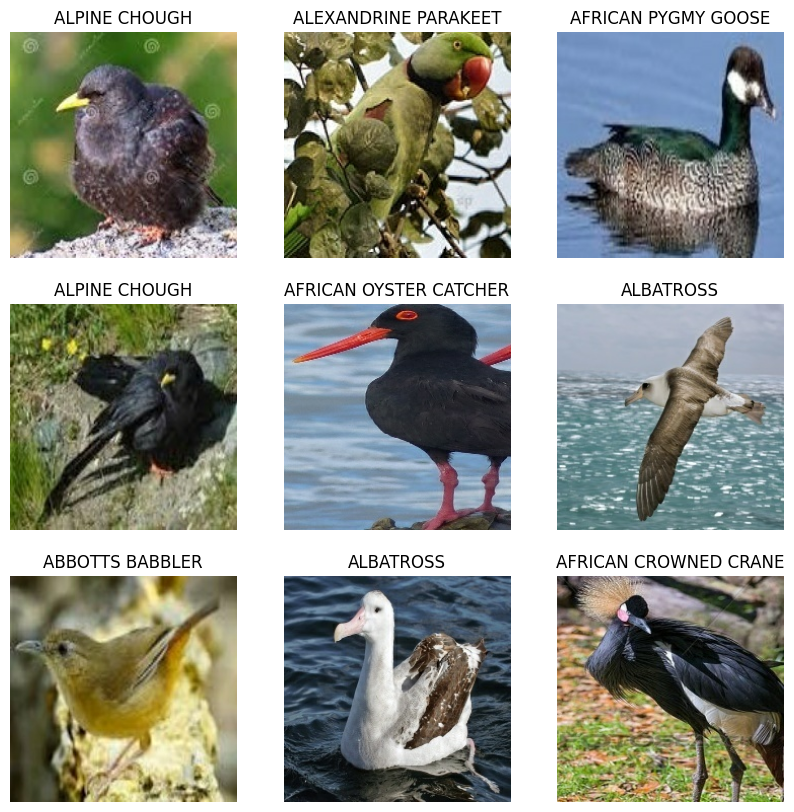

In [ ]:
plt.figure(figsize=(10,10))
for image,labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

* un  CNN  simple ,  efficace pour la classification d’images

*  Il utilise plusieurs couches de convolution pour :
   * extraire les caractéristiques visuelles
   * couches denses pour faire la prédiction finale

In [ ]:
model = Sequential([

    layers.Rescaling(1./255),
    # -> normalisation des pixels entre 0 et 1 pour faciliter l’apprentissage
    layers.Conv2D(16,3,padding='same',activation='relu'),
    # ->  première couche de convolution pour détecter des motifs simples (bords, couleurs)
    layers.MaxPooling2D(),
    # -> réduction de la taille de l’image pour garder les informations principales
    layers.Conv2D(32,3,padding='same',activation='relu'),
    # -> deuxième convolution pour apprendre des motifs plus complexes
    layers.MaxPool2D(),
    # -> encore une réduction de taille pour alléger les calculs
    layers.Conv2D(64,3,padding='same',activation='relu'),
    # ->  troisième convolution pour extraire des caractéristiques plus abstraites
    layers.MaxPooling2D(),
    # -> dernière réduction de taille avant la partie dense
    layers.Flatten(),
    # -> transformation des données 2D en vecteur 1D pour la classification
    layers.Dropout(0.2),
    # ->  régularisation pour éviter le surapprentissage
    layers.Dense(128),
    # -> couche dense qui apprend à combiner les caractéristiques pour prendre une décision
    layers.Dense(len(data_cat))
    # -> couche de sortie qui donne la classe prédite (le type d’oiseau)
])

**Compilation du modèle**


* Optimiseur : Adam (adaptatif et performant).

* Perte : SparseCategoricalCrossentropy(from_logits=True) car labels entiers et pas de softmax en sortie.

* Métrique : accuracy.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### **Justificatifs des choix  des parametres**


**epochs = 15**
* Compromis entre performance et coût :

* Trop peu d’époques : sous-apprentissage.

* Trop d’époques : risque de surapprentissage (overfitting).

* Avec validation_data, on peut surveiller l’évolution de val_loss pour détecter quand s’arrêter.

**batch_size = 32**
* Taille classique et efficace pour la plupart des GPU.

* Assez petit pour favoriser la généralisation, assez grand pour stabiliser les gradients.

* Permet une meilleure utilisation mémoire que des batchs trop grands.


**verbose = 1**
* Affiche les métriques (loss/accuracy) en temps réel.

* Utile pour suivre visuellement la progression de l'apprentissage.

In [ ]:
epochs_size= 15 # Définit le nombre de passes complètes sur le dataset d’entraînement.

# Lanceement de  l'entraînement supervisé du modèle.
history= model.fit(data_train,
                   validation_data=data_val, # évalueation du modèle à la fin de chaque époque avec validation dataset (détection d’overfitting).
                   epochs=epochs_size,
                   batch_size=32, #Nombre d'exemples traités avant une mise à jour des poids.
                   verbose=1) #Affiche une barre de progression détaillée à chaque époque.

Epoch 1/15
101/101 ━━━━━━━━━━━━━━━━━━━━ 330s 3s/step - accuracy: 0.1435 - loss: 3.0675 - val_accuracy: 0.5200 - val_loss: 1.5833
Epoch 2/15
101/101 ━━━━━━━━━━━━━━━━━━━━ 328s 3s/step - accuracy: 0.6144 - loss: 1.2811 - val_accuracy: 0.6100 - val_loss: 1.1963
Epoch 3/15
101/101 ━━━━━━━━━━━━━━━━━━━━ 308s 3s/step - accuracy: 0.8269 - loss: 0.5847 - val_accuracy: 0.6700 - val_loss: 1.1977
Epoch 4/15
101/101 ━━━━━━━━━━━━━━━━━━━━ 326s 3s/step - accuracy: 0.9241 - loss: 0.2580 - val_accuracy: 0.6800 - val_loss: 1.2023
Epoch 5/15
101/101 ━━━━━━━━━━━━━━━━━━━━ 320s 3s/step - accuracy: 0.9605 - loss: 0.1303 - val_accuracy: 0.6800 - val_loss: 1.4478
Epoch 6/15
101/101 ━━━━━━━━━━━━━━━━━━━━ 293s 3s/step - accuracy: 0.9775 - loss: 0.0712 - val_accuracy: 0.6900 - val_loss: 1.2565
Epoch 7/15
101/101 ━━━━━━━━━━━━━━━━━━━━ 296s 3s/step - accuracy: 0.9831 - loss: 0.0555 - val_accuracy: 0.6900 - val_loss: 1.4935
Epoch 8/15
101/101 ━━━━━━━━━━━━━━━━━━━━ 323s 3s/step - accuracy: 0.9855 - loss: 0.0415 - val_accu

## **Suivie de l'evolution de l'apprentissage du modele au fil des epoques**

* Détecter le surapprentissage (overfitting) ou le sous-apprentissage (underfitting).

* Comparer la performance entre l'entraînement et la validation.

* Choisir un bon nombre d’époques pour arrêter l’apprentissage au bon moment

* augmentation infini **val_loss** par rapport dimunition **train_loss**  -->  **surapprentissage détecté.**

* augmentation infini **train_accuracy** par rapport dimunition **val_accuracy**  -->  overfitting.

Text(0.5, 1.0, 'Loss')

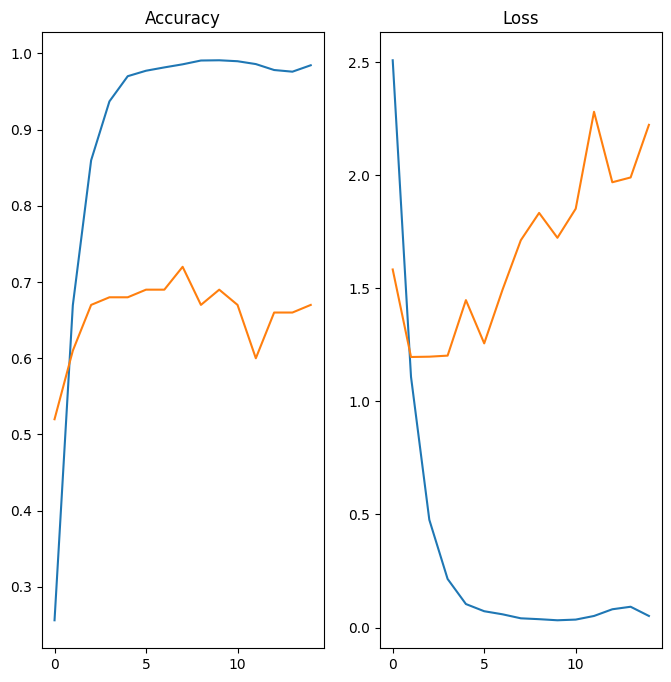

In [ ]:
epochs_range= range (epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, history.history['accuracy'], label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(epochs_range, history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')
# entrainement -> courbe bleu
# validation -> courbe orange
#manque plt.legend() pour affiches labels

### **Interprétation des resultat ACCURACY**

* Courbe bleue (Entraînement) :
Elle monte très rapidement pour atteindre plus de 95 % de précision, puis se stabilise → cela indique que le modèle apprend très bien les données d'entraînement.

* Courbe orange (Validation) :
Elle plafonne autour de 65 à 70 %, sans réelle amélioration après quelques époques. Elle reste nettement plus basse que celle de l'entraînement.

➤ Interprétation :
Le modèle surapprend (overfitting). Il mémorise les données d'entraînement, mais généralise mal sur les données de validation.

### **Interprétation des resultat LOSS**

* Courbe bleue (Entraînement) :
La perte chute rapidement à presque zéro, ce qui confirme que le modèle "colle" aux données d'entraînement.

* Courbe orange (Validation) :
La perte reste élevée et augmente même à partir de la 6e ou 7e époque, ce qui est anormal : le modèle devient de moins en moins bon sur les données qu’il ne connaît pas.

➤ Interprétation :
Ce comportement est un signe clair de surapprentissage. À partir d’un certain point, le modèle apprend trop les détails/bruits de l'entraînement et dégrade ses performances sur des données réelles.

Normalization de l'image a predire : prête pour être passée dans model.predict()

In [ ]:
image = 'Birds_Species_dataset/Others/try.jpg'

#charge et redimensionne l’image à la taille attendue par le modèle
image = tf.keras.utils.load_img(image,target_size=(img_height,img_width))

#convertit l’image en tableau compatible avec TensorFlow (inutile ici, redondant).
img_arr = tf.keras.utils.array_to_img(image)

#ajoute une dimension batch → forme finale : (1, 224, 224, 3)

img_bat = tf.expand_dims(img_arr,0)

In [ ]:
predict =model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


### **Convertion des logits (valeurs brutes de prédiction) en probabilités via la fonction softmax.**



* applique la fonction softmax pour transformer ces scores en probabilités (valeurs entre 0 et 1 dont la somme est 1).
* exemple : Si predict = [2.0, 1.0, 0.1], alors score ≈ [0.65, 0.24, 0.11].

In [ ]:

score = tf.nn.softmax(predict)


### **Affichage de la classe prédite et sa probabilité associée.**

* np.argmax(score) : Retourne l'indice de la probabilité la plus élevée dans score ( la classe prédite).

* data_cat[np.argmax(score)] : récupérer le nom de la classe dans une liste data_cat avec l indice recuperer deja avant

* np.max(score)*100 : Récupère la probabilité maximale et la convertit en pourcentage (ex: 0.65 → 65%).

### **Pipeline de la prediction**

* Le modèle prédit les logits pour l'image.

* Les logits sont convertis en probabilités interprétables.

* La classe avec la probabilité la plus élevée est affichée avec son score de confiance.

In [ ]:


print('Bird Species in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))



Bird Species in image is AFRICAN CROWNED CRANE with accuracy of 82.99


In [ ]:
model.save('Image_classify_Birds_Model.keras')